## **SECTION I - Emmanuel**

# Library Imports

In [304]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [305]:
# Importing all necessary libraries and installs
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import yfinance as yf

# Customer Profile 
This portion of the program will build a profile for the customer. To do this, the program will ask the customer a series of questions and create a dataframe to store this information.

In [306]:
# User inputs their name here
user_name1 = str(input("Hello! To start the application process, please insert your first name here: ")).capitalize()
user_name2 = str(input("Please insert your last name here: ")).capitalize()

Hello! To start the application process, please insert your first name here: John
Please insert your last name here: Doe


In [307]:
# User inputs their age here
user_age = int(input("Welcome to Stock Advisor, " + user_name1 + " " + user_name2 + "! To continue with your recommendation, please input your age. Note that you need to be at least 18 years of age to use this application. "))

# If the user's age falls below the legal threshold, the application will be terminated
if user_age < 18:
    print("Sorry, you need to be above 18 to use this application. Have a good day!")
    quit()

Welcome to Stock Advisor, John Doe! To continue with your recommendation, please input your age. Note that you need to be at least 18 years of age to use this application. 23


In [308]:
# User inputs their location here
user_location = str(input("Almost done! Please declare your province of residence by inputting the two letter code associated with your province (i.e. BC for British Columbia) ")).upper()

# Creating a list of acceptable inputs
location_list = ["ON", "BC", "YT", "NT", "NU", "AB", "SK", "MB", "QC", "NL", "NB", "PE", "NS"]

# Testing the user input by comparing to the location_list variable; if any input matches one of the values in the location list, the program will continue
if user_location not in location_list:
    print("You must reside in Canada to use this application. Have a good day!")

Almost done! Please declare your province of residence by inputting the two letter code associated with your province (i.e. BC for British Columbia) ON


In [309]:
# All the user inputs are stored in a dictionary and transformed into a dataframe
profile_storage = {"First Name" : [user_name1], "Last Name" : [user_name2], "Age" : [user_age], "Location" : [user_location]}
user_profile_df = pd.DataFrame(profile_storage)
print("Here is your profile information:")
user_profile_df

Here is your profile information:


,First Name,Last Name,Age,Location
0,John,Doe,23,ON


# Retrieving and Preparing the Data
This section of the program takes the user input in the form of any ticker of their choice. From there the program will automatically retrieve the raw data from the Yahoo Finance API and prepare it to be used in the machine learning models later in the program.

In [310]:
# User inputs the ticker of their choice here
ticker_input = str(input("Please input the ticker you would like a recommendation on: ")).upper()

Please input the ticker you would like a recommendation on: BA


In [311]:
# Calling the Yahoo Finance API to fetch the historical data of the user's stock from the past 5 years
stock_ticker = yf.Ticker(ticker_input).history(period="5y")
stock_df = pd.DataFrame(stock_ticker)

# Reviewing the raw dataframe
stock_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-26 00:00:00-04:00,316.499782,317.898012,309.901234,315.053650,5392900,0.0,0.0
2018-03-27 00:00:00-04:00,317.486225,320.713660,305.505423,307.535736,5355500,0.0,0.0
2018-03-28 00:00:00-04:00,308.234841,309.566025,298.006642,306.482239,5634700,0.0,0.0
2018-03-29 00:00:00-04:00,309.700068,316.499723,308.378441,314.009705,3652100,0.0,0.0
2018-04-02 00:00:00-04:00,311.443119,315.982594,303.752812,308.799866,5024900,0.0,0.0


In [312]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-03-26 00:00:00-04:00 to 2023-03-23 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [313]:
# Creating a new column in the dataframe to calculate the returns based on the stock's closing price
stock_df["Actual Returns"] = stock_df["Close"].pct_change()

# Storing the close price and the actual returns in a new dataframe and dropping all unneeded columns
stock_signals = stock_df.drop(columns= ["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])

In [314]:
# Checking the datatypes of the columns contained in the new dataframe
stock_signals.dtypes

Close             float64
Actual Returns    float64
dtype: object

In [315]:
# Checking the null values of the new dataframe
stock_signals.dropna()

,Close,Actual Returns
Date,,
2018-03-27 00:00:00-04:00,307.535736,-0.023862
2018-03-28 00:00:00-04:00,306.482239,-0.003426
2018-03-29 00:00:00-04:00,314.009705,0.024561
2018-04-02 00:00:00-04:00,308.799866,-0.016591
2018-04-03 00:00:00-04:00,316.825439,0.025990
...,...,...
2023-03-17 00:00:00-04:00,201.050003,-0.010532
2023-03-20 00:00:00-04:00,204.770004,0.018503
2023-03-21 00:00:00-04:00,204.699997,-0.000342


In [316]:
# Setting up the short window and long window
short_window = 15
long_window = 100

In [317]:
# Creating a column in the stock_signals dataframe to store the fast and slow simple moving averages
stock_signals["Fast SMA"] = stock_signals["Close"].rolling(window=short_window).mean()
stock_signals["Slow SMA"] = stock_signals["Close"].rolling(window=long_window).mean()

# Dropping any null values from the dataframe
stock_signals = stock_signals.dropna()

# Reviewing the dataframe
stock_signals.head()

,Close,Actual Returns,Fast SMA,Slow SMA
Date,,,,
2018-08-15 00:00:00-04:00,320.888336,-0.021761,335.205668,331.063940
2018-08-16 00:00:00-04:00,334.642334,0.042862,334.459399,331.259826
2018-08-17 00:00:00-04:00,335.048584,0.001214,333.654877,331.534955
2018-08-20 00:00:00-04:00,339.246368,0.012529,333.745546,331.862596
2018-08-21 00:00:00-04:00,342.177063,0.008639,333.695372,332.144270


In [318]:
# Creating a new column in the stock_signals dataframe called "Signal" to store buy/sell signals depending on positive/negative "Actual Returns"
stock_signals['Signal'] = 0

# When the evaluated data point in actual returns is greater than zero, set the corresponding signal datapoint to 1
stock_signals.loc[(stock_signals['Actual Returns'] >= 0), 'Signal'] = 1

# When the evaluated data point in actual returns is less than zero, set the corresponding signal datapoint to -1
stock_signals.loc[(stock_signals['Actual Returns'] < 0), 'Signal'] = -1

# Reviewing the dataframe
stock_signals.head()

,Close,Actual Returns,Fast SMA,Slow SMA,Signal
Date,,,,,
2018-08-15 00:00:00-04:00,320.888336,-0.021761,335.205668,331.063940,-1
2018-08-16 00:00:00-04:00,334.642334,0.042862,334.459399,331.259826,1
2018-08-17 00:00:00-04:00,335.048584,0.001214,333.654877,331.534955,1
2018-08-20 00:00:00-04:00,339.246368,0.012529,333.745546,331.862596,1
2018-08-21 00:00:00-04:00,342.177063,0.008639,333.695372,332.144270,1


In [319]:
stock_signals['Signal'].value_counts()

-1    599
 1    560
Name: Signal, dtype: int64

In [320]:
# Creating a new column in the stock_signals dataframe called "Strategy Returns" and storing the product of corresponding datapoints in the "Actual Returns" and "Signal" column
stock_signals['Strategy Returns'] = stock_signals['Actual Returns'] * stock_signals['Signal'].shift()

# Reviewing the dataframe
display(stock_signals.head(),stock_signals.tail())

,Close,Actual Returns,Fast SMA,Slow SMA,Signal,Strategy Returns
Date,,,,,,
2018-08-15 00:00:00-04:00,320.888336,-0.021761,335.205668,331.063940,-1,NaN
2018-08-16 00:00:00-04:00,334.642334,0.042862,334.459399,331.259826,1,-0.042862
2018-08-17 00:00:00-04:00,335.048584,0.001214,333.654877,331.534955,1,0.001214
2018-08-20 00:00:00-04:00,339.246368,0.012529,333.745546,331.862596,1,0.012529
2018-08-21 00:00:00-04:00,342.177063,0.008639,333.695372,332.144270,1,0.008639


,Close,Actual Returns,Fast SMA,Slow SMA,Signal,Strategy Returns
Date,,,,,,
2023-03-17 00:00:00-04:00,201.050003,-0.010532,205.078668,191.4309,-1,-0.010532
2023-03-20 00:00:00-04:00,204.770004,0.018503,205.366001,192.0581,1,-0.018503
2023-03-21 00:00:00-04:00,204.699997,-0.000342,205.576001,192.6386,-1,-0.000342
2023-03-22 00:00:00-04:00,196.160004,-0.041720,205.016668,193.2623,-1,0.041720
2023-03-23 00:00:00-04:00,197.899994,0.008870,204.206001,193.8437,1,-0.008870


In [321]:
# Creating a new dataframe called X to store fast and slow SMAs
X = stock_signals[['Fast SMA', 'Slow SMA']].shift().dropna()

# Review the dataframe
X.head()

,Fast SMA,Slow SMA
Date,,
2018-08-16 00:00:00-04:00,335.205668,331.063940
2018-08-17 00:00:00-04:00,334.459399,331.259826
2018-08-20 00:00:00-04:00,333.654877,331.534955
2018-08-21 00:00:00-04:00,333.745546,331.862596
2018-08-22 00:00:00-04:00,333.695372,332.144270


In [322]:
# 
#Create the target set selecting the Signal column and assiging it to y
y = stock_signals['Signal']

# Review the value counts
y.value_counts()

-1    599
 1    560
Name: Signal, dtype: int64

In [323]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2018-08-16 00:00:00-04:00


In [324]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2018-11-16 00:00:00-05:00


In [325]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,Fast SMA,Slow SMA
Date,,
2018-08-16 00:00:00-04:00,335.205668,331.063940
2018-08-17 00:00:00-04:00,334.459399,331.259826
2018-08-20 00:00:00-04:00,333.654877,331.534955
2018-08-21 00:00:00-04:00,333.745546,331.862596
2018-08-22 00:00:00-04:00,333.695372,332.144270


In [326]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,Fast SMA,Slow SMA
Date,,
2018-08-16 00:00:00-04:00,335.205668,331.063940
2018-08-17 00:00:00-04:00,334.459399,331.259826
2018-08-20 00:00:00-04:00,333.654877,331.534955
2018-08-21 00:00:00-04:00,333.745546,331.862596
2018-08-22 00:00:00-04:00,333.695372,332.144270


In [327]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Machine Learning Models
This section of the program will use the same set of prepared testing and training data and fit into three different machine learning models:
1. AdaBoost
2. SVC
3. LSTM

## AdaBoost

In [328]:
# Importing a new classifier for the second machine learning model
from sklearn.ensemble import AdaBoostClassifier

# Activating the model instance
adaboost_model = AdaBoostClassifier()

In [329]:
# Fit the model using the training data
adaboost_model = adaboost_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
adaboost_pred = adaboost_model.predict(X_test_scaled)

# Review the model's predicted values
adaboost_pred[:10]

array([-1, -1, -1, -1, -1, -1, -1,  1,  1, -1])

In [330]:
# Use a classification report to evaluate the model using the predictions and testing data
adaboost_testing_report = classification_report(y_test, adaboost_pred)

# Print the classification report
print(adaboost_testing_report)

              precision    recall  f1-score   support

          -1       0.53      0.26      0.34       565
           1       0.49      0.75      0.59       527

    accuracy                           0.50      1092
   macro avg       0.51      0.50      0.47      1092
weighted avg       0.51      0.50      0.46      1092



In [331]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
ada_predictions_df = pd.DataFrame(index=X_test.index)

# Add the AdaBoost model predictions to the DataFrame
ada_predictions_df['Predicted'] = adaboost_pred

# Add the actual returns to the DataFrame
ada_predictions_df['Actual Returns'] = stock_signals["Actual Returns"]

# Add the strategy returns to the DataFrame
ada_predictions_df['Strategy Returns'] = ada_predictions_df["Actual Returns"] * ada_predictions_df["Predicted"]

# Review the DataFrame
display(ada_predictions_df.head())
display(ada_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-11-19 00:00:00-05:00,-1,-0.044679,0.044679
2018-11-20 00:00:00-05:00,-1,-0.010095,0.010095
2018-11-21 00:00:00-05:00,-1,-0.001196,0.001196
2018-11-23 00:00:00-05:00,-1,-0.015757,0.015757
2018-11-26 00:00:00-05:00,-1,0.012935,-0.012935


,Predicted,Actual Returns,Strategy Returns
Date,,,
2023-03-17 00:00:00-04:00,1,-0.010532,-0.010532
2023-03-20 00:00:00-04:00,1,0.018503,0.018503
2023-03-21 00:00:00-04:00,1,-0.000342,-0.000342
2023-03-22 00:00:00-04:00,1,-0.041720,-0.041720
2023-03-23 00:00:00-04:00,1,0.008870,0.008870


<Axes: xlabel='Date'>

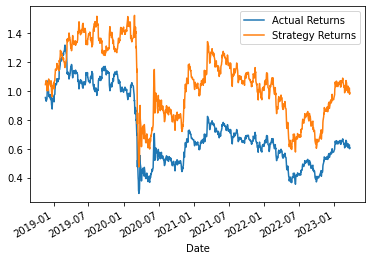

In [332]:
# Plot the actual returns versus the strategy returns
(1 + ada_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

# Support Vector Machine 


[link text](https://)## **SECTION IV - Akshay**

In [333]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 

In [334]:
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

In [335]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

          -1       0.52      0.03      0.05       565
           1       0.48      0.97      0.65       527

    accuracy                           0.48      1092
   macro avg       0.50      0.50      0.35      1092
weighted avg       0.50      0.48      0.34      1092



In [336]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index = X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = stock_signals['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-11-19 00:00:00-05:00,-1,-0.044679,0.044679
2018-11-20 00:00:00-05:00,-1,-0.010095,0.010095
2018-11-21 00:00:00-05:00,-1,-0.001196,0.001196
2018-11-23 00:00:00-05:00,1,-0.015757,-0.015757
2018-11-26 00:00:00-05:00,1,0.012935,0.012935


,Predicted,Actual Returns,Strategy Returns
Date,,,
2023-03-17 00:00:00-04:00,1,-0.010532,-0.010532
2023-03-20 00:00:00-04:00,1,0.018503,0.018503
2023-03-21 00:00:00-04:00,1,-0.000342,-0.000342
2023-03-22 00:00:00-04:00,1,-0.041720,-0.041720
2023-03-23 00:00:00-04:00,1,0.008870,0.008870


<Axes: xlabel='Date'>

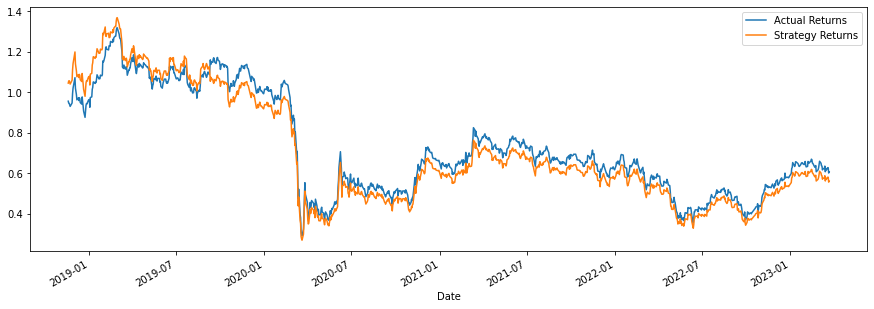

In [337]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(figsize = (15,5))

# Long Short-term Memory

An implementation of a Long short-term memory model

In [338]:
# Importing the required Libraries for LTSM Model
import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM  

In [339]:
# Reviewing the Data
df = stock_df
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-03-26 00:00:00-04:00 to 2023-03-23 00:00:00-04:00
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1258 non-null   float64
 1   High            1258 non-null   float64
 2   Low             1258 non-null   float64
 3   Close           1258 non-null   float64
 4   Volume          1258 non-null   int64  
 5   Dividends       1258 non-null   float64
 6   Stock Splits    1258 non-null   float64
 7   Actual Returns  1257 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 88.5 KB


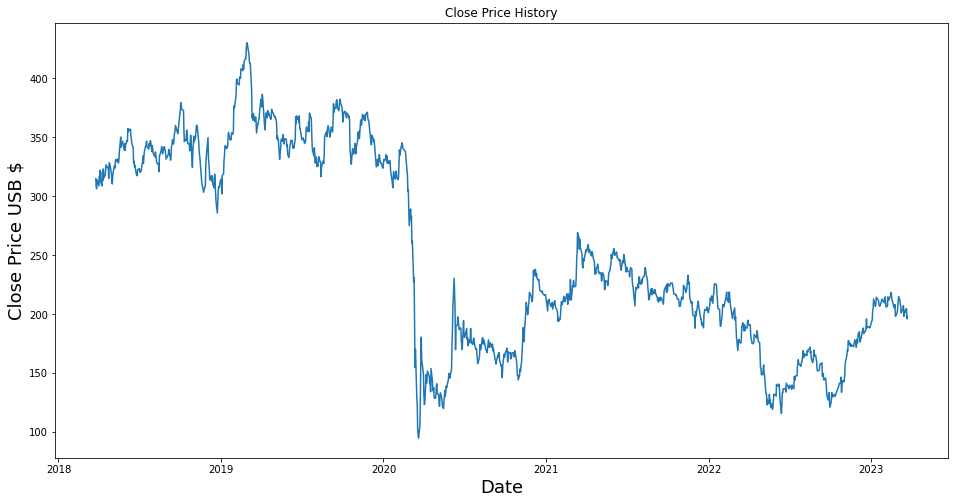

In [340]:
#Visualise closing data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USB $', fontsize=18)
plt.show()


[array([0.65627868, 0.63385655, 0.6307145 , 0.65316512, 0.63762681,
       0.66156303, 0.65190852, 0.67750109, 0.64813808, 0.63774104,
       0.6730167 , 0.65167997, 0.68058589, 0.65716401, 0.66427647,
       0.67841519, 0.69064024, 0.68961191, 0.68398515, 0.68447065,
       0.65653571, 0.6959529 , 0.69575293, 0.69029737, 0.66938907,
       0.65790681, 0.64262545, 0.66119167, 0.67187414, 0.68901219,
       0.68312803, 0.70063744, 0.70431167, 0.69969003, 0.70580446,
       0.69871403, 0.69541298, 0.70451273, 0.72486501, 0.76129269,
       0.73574435, 0.74777217, 0.74716935, 0.7502983 , 0.72845314,
       0.74484411, 0.72753458, 0.74062449, 0.75213541, 0.75032697,
       0.78322377, 0.77452596, 0.77731039, 0.781444  , 0.78052544,
       0.76109172, 0.75698679, 0.74395431, 0.73494066, 0.69584358])]
[0.700350273197621]

[array([0.65627868, 0.63385655, 0.6307145 , 0.65316512, 0.63762681,
       0.66156303, 0.65190852, 0.67750109, 0.64813808, 0.63774104,
       0.6730167 , 0.65167997, 0.6805

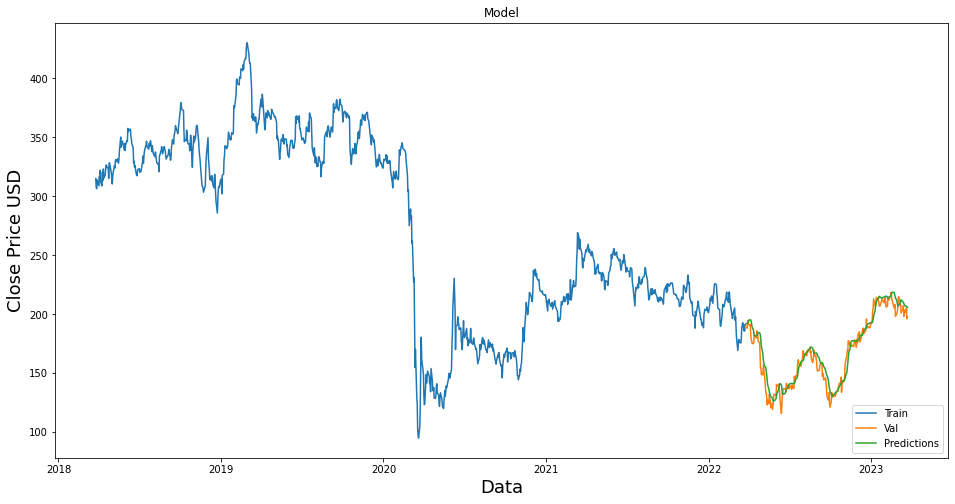

In [341]:
#Creating dataframe with close
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0 ])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Create the testing data set
#Create a new array containing scaled values 
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the models predicted price values
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

#Evaluate our model getting RMSE root mean squared error
rmse = np.sqrt(np.mean(lstm_predictions - y_test )**2)
rmse

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = lstm_predictions
#Vis the dat
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [342]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


 ‘BeautifulSoup’ is needed to parse data from FinViz while ‘requests’ is needed to get data. ‘Pandas’ is used to store the data in DataFrames while ‘Matplotlib’ is used to plot the sentiment on a chart. Finally, the ‘nltk.sentiment.vader’ library is used to perform sentiment analysis on the news headlines!

[Source Code](https://medium.datadriveninvestor.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638)

In [343]:
pip install alpaca-trade-api


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [344]:
pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [345]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load APIs

In [346]:
# Store the Date, Time and News Headlines Data

finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = [ticker_input]
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [347]:
news_table

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" width="130">Mar-23-23 06:37PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/m/5d57c791-2dd0-3dc0-a8aa-a051bc659516/pentagon-probes-why-boeing.html" onclick="trackAndOpenNews(event, 'The Wall Street Journal', 'https://finance.yahoo.com/m/5d57c791-2dd0-3dc0-a8aa-a051bc659516/pentagon-probes-why-boeing.html');" rel="nofollow" target="_blank">Pentagon Probes Why Boeing Staff Worked on Air Force One Planes Without Security Credentials</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> The Wall Street Journal</span></div></div></td></tr>
<tr><td align="right" width="130">06:05PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/nasa-delays-boeing-star

In [348]:
# Print the Data Stored in news_tables
# Read one single day of headlines for ticker_input 
tckr = news_tables[ticker_input]
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
tckr_tr = tckr.findAll('tr')
for i, table_row in enumerate(tckr_tr):
 # Read the text of the element 'a' into 'link_text'
 a_text = table_row.a.text
 # Read the text of the element 'td' into 'data_text'
 td_text = table_row.td.text
 # Print the contents of 'link_text' and 'data_text' 
 print(a_text)
 print(td_text)
 # Exit after printing 4 rows of data
 if i == 3:
  break

Pentagon Probes Why Boeing Staff Worked on Air Force One Planes Without Security Credentials
Mar-23-23 06:37PM
NASA delays Boeing Starliner's debut crewed voyage
06:05PM
UPDATE 1-Pentagon probes lapse in Boeing security credentials for Air Force One
02:35PM
Pentagon probes lapse in Boeing security credentials for Air Force One - WSJ
01:33PM


In [349]:
parsed_news = []

# Iterate through all tr tags in 'news_table'
for x in tckr_tr:
        # read the text from each tr tag into text
        # get text from a only
        text = tckr.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = tckr.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
else:
        date = date_scrape[0]
        time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker_name = ticker_input
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker_name, date, time, text])
   
parsed_news[:3] # print first 4 rows of news

[['BA',
  'Mar-23-23',
  '06:37PM',
  'Pentagon Probes Why Boeing Staff Worked on Air Force One Planes Without Security Credentials']]

In [350]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
# Set column names
columns = ['ticker_name', 'date', 'time', 'headline']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head()

,ticker_name,date,time,headline,neg,neu,pos,compound
0,BA,2023-03-23,06:37PM,Pentagon Probes Why Boeing Staff Worked on Air...,0.135,0.865,0.0,-0.2584


# **Sentiment Analysis for Stocks using Twitter+GAN**

#### Logic: The method before was a cloud based data pipline parsing data in real time, however working with real time data can be quite challenging in terms of cleaning and error sampling. To be able to make well informed decisions data input quality matters, which is where we use Kaggle for a sample dataset to test the vader lexicon package to its true potential.

### Process: Using Generative Adversarial Networks (GANs) to parse processed and vetted tweets from [Kaggle](https://www.kaggle.com/code/equinxx/stock-prediction-gan-twitter-sentiment-analysis) we call on the vader sentiment analyser to create daily averages of all tweets for a particular stock ticker. 
 
**IMPORTANT:** *This CSV file contains tweets for the following companies: TSLA, MSFT, PG, META, AMZN, GOOG, AMD, AAPL, NFLX, TSM, KO, F, COST, DIS, VZ, CRM, INTC, BA, BX, NOC, PYPL, ENPH, NIO, ZS, XPEV!*
 
**IMPORTANT:** *All tweets are from 30-09-2021 till 30-09-2022*




In [351]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [352]:
tweety_nest = pd.read_csv('stock_tweets.csv')

In [353]:
# How big is our tweet database?
display(tweety_nest.shape,tweety_nest.head(5))

(80793, 4)

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [354]:
ticker_tweets = tweety_nest[tweety_nest['Stock Name'] == ticker_input]
print(ticker_tweets.shape)
ticker_tweets.head()

(399, 4)


,Date,Tweet,Stock Name,Company Name
75815,2022-09-26 00:01:01+00:00,$TSLA - Above 273 - Trade Idea 💡 - Sept 30 280...,BA,The Boeing Company
75816,2022-09-25 02:00:37+00:00,Boeing $BA Stock Drops as the Company Agrees t...,BA,The Boeing Company
75817,2022-09-23 06:55:00+00:00,🐳 news:\n\n- $AAPL x NFL superbowl\n- Stock tr...,BA,The Boeing Company
75818,2022-09-22 21:24:13+00:00,Here's the 34 S&amp;P 500 stocks with market c...,BA,The Boeing Company
75819,2022-09-22 21:09:08+00:00,JUST IN: The @usairforce has awarded @Raytheon...,BA,The Boeing Company


In [355]:
ticker_sentiment = ticker_tweets.copy()
ticker_sentiment["sentiment_score"] = ''
ticker_sentiment["Negative"] = ''
ticker_sentiment["Neutral"] = ''
ticker_sentiment["Positive"] = ''
ticker_sentiment.head()


,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
75815,2022-09-26 00:01:01+00:00,$TSLA - Above 273 - Trade Idea 💡 - Sept 30 280...,BA,The Boeing Company,,,,
75816,2022-09-25 02:00:37+00:00,Boeing $BA Stock Drops as the Company Agrees t...,BA,The Boeing Company,,,,
75817,2022-09-23 06:55:00+00:00,🐳 news:\n\n- $AAPL x NFL superbowl\n- Stock tr...,BA,The Boeing Company,,,,
75818,2022-09-22 21:24:13+00:00,Here's the 34 S&amp;P 500 stocks with market c...,BA,The Boeing Company,,,,
75819,2022-09-22 21:09:08+00:00,JUST IN: The @usairforce has awarded @Raytheon...,BA,The Boeing Company,,,,


In [356]:
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in ticker_sentiment.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ticker_sentiment.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        ticker_sentiment.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        ticker_sentiment.at[indx, 'Negative'] = sentence_sentiment['neg']
        ticker_sentiment.at[indx, 'Neutral'] = sentence_sentiment['neu']
        ticker_sentiment.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (ticker_sentiment.loc[indexx, 'Tweet'])
        print (indx)
        break

In [357]:
# Looking at the new dataframe containing the sentiment_score compounded and categorically structured. 
display(ticker_sentiment.shape,ticker_sentiment.head(5))

(399, 8)

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
75815,2022-09-26 00:01:01+00:00,$TSLA - Above 273 - Trade Idea 💡 - Sept 30 280...,BA,The Boeing Company,0.0,0.0,1.0,0.0
75816,2022-09-25 02:00:37+00:00,Boeing $BA Stock Drops as the Company Agrees t...,BA,The Boeing Company,0.4588,0.047,0.805,0.148
75817,2022-09-23 06:55:00+00:00,🐳 news:\n\n- $AAPL x NFL superbowl\n- Stock tr...,BA,The Boeing Company,-0.9217,0.292,0.708,0.0
75818,2022-09-22 21:24:13+00:00,Here's the 34 S&amp;P 500 stocks with market c...,BA,The Boeing Company,0.0,0.0,1.0,0.0
75819,2022-09-22 21:09:08+00:00,JUST IN: The @usairforce has awarded @Raytheon...,BA,The Boeing Company,-0.1027,0.104,0.805,0.091


In [358]:
ticker_sentiment['Date'] = pd.to_datetime(ticker_sentiment['Date'])
ticker_sentiment['Date'] = ticker_sentiment['Date'].dt.date
ticker_sentiment = ticker_sentiment.drop(columns=['Negative', 'Positive', 'Neutral', 'Stock Name', 'Company Name'])

In [359]:
display(ticker_sentiment.head(5),ticker_sentiment.tail(5))

,Date,Tweet,sentiment_score
75815,2022-09-26,$TSLA - Above 273 - Trade Idea 💡 - Sept 30 280...,0.0
75816,2022-09-25,Boeing $BA Stock Drops as the Company Agrees t...,0.4588
75817,2022-09-23,🐳 news:\n\n- $AAPL x NFL superbowl\n- Stock tr...,-0.9217
75818,2022-09-22,Here's the 34 S&amp;P 500 stocks with market c...,0.0
75819,2022-09-22,JUST IN: The @usairforce has awarded @Raytheon...,-0.1027


,Date,Tweet,sentiment_score
76209,2021-10-06,NASA confirms the reassignment of astronauts N...,0.0
76210,2021-10-06,$CYBL Acquisition this week\n\nAnother acquisi...,-0.3432
76211,2021-10-05,$BA Toying with the idea of taking flight. Ins...,0.0
76212,2021-10-03,"10/3 Options Watchlist\n\n$ROKU over 317.5, 32...",0.2244
76213,2021-10-03,$BA wedge on the weekly. Can see follow throug...,0.0


In [360]:
# Daily Sentiment Average for ticker
tweety_egg = ticker_sentiment.groupby([ticker_sentiment['Date']]).mean()

# Print info
display(tweety_egg.shape,tweety_egg.head(5))


(211, 1)

,sentiment_score
Date,
2021-10-03,0.11220
2021-10-05,0.00000
2021-10-06,0.19810
2021-10-07,0.46210
2021-10-08,0.65065


In [361]:
# Cleaning date columns to ensure they are the same type for data and twitter_egg
data.reset_index()
data['Date_2'] = pd.to_datetime(df.index.date)
data.set_index('Date_2')



,Close
Date_2,
2018-03-26,315.053650
2018-03-27,307.535736
2018-03-28,306.482239
2018-03-29,314.009705
2018-04-02,308.799866
...,...
2023-03-17,201.050003
2023-03-20,204.770004
2023-03-21,204.699997


In [362]:
# Ensure same dtype 
data.index.astype('datetime64[ns]')
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-03-26 00:00:00-04:00 to 2023-03-23 00:00:00-04:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   1258 non-null   float64       
 1   Date_2  1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.5 KB


In [363]:
tweety_egg.index.astype('datetime64[ns]')
tweety_egg.index = pd.to_datetime(tweety_egg.index)
tweety_egg.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2021-10-03 to 2022-09-26
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sentiment_score  211 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [364]:
# Joining Sentiment Analysis Data with Stock Data
tweety_hatched = data.join(tweety_egg, how="left", on="Date_2")
print(tweety_hatched.shape)



(1258, 3)


In [365]:
# Veiw the final dataframe
final_df = tweety_hatched.dropna()
final_df.set_index('Date_2')


,Close,sentiment_score
Date_2,,
2021-10-05,224.419998,0.000000
2021-10-06,224.990005,0.198100
2021-10-07,226.479996,0.462100
2021-10-08,226.389999,0.650650
2021-10-11,226.449997,0.202300
...,...,...
2022-09-08,157.789993,0.000000
2022-09-15,149.779999,0.285950
2022-09-22,138.710007,-0.154633


In [366]:
ticker_sentiment = final_df['sentiment_score'].mean()
ticker_sentiment

0.17044277777777778

## Jonathan

In [367]:
import requests

alpha_api_key = "CWZI84Q17331185U"

response = requests.get(f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker_input}&apikey={alpha_api_key}")

stock_name = response.json()["Name"]

stock_name

'The Boeing Company'

In [368]:
svc_opinion = ''

if predictions_df['Predicted'].iloc[-1] == 1:
  svc_opinion = 'buy'
elif predictions_df['Predicted'].iloc[-1] == -1:
  svc_opinion = 'sell'
else:
  svc_opinion = 'hold'

print(f"SVC: It would be best for you to {svc_opinion} {stock_name}")

SVC: It would be best for you to buy The Boeing Company


In [369]:
ada_opinion = ''

if ada_predictions_df['Predicted'].iloc[-1] == 1:
  ada_opinion = 'buy'
elif ada_predictions_df['Predicted'].iloc[-1] == -1:
  ada_opinion = 'sell'
else:
  ada_opinion = 'hold'

print(f"ADABoost: It would be best for you to {ada_opinion} {stock_name}")

ADABoost: It would be best for you to buy The Boeing Company


In [370]:
LSTM_opinion = ''

last_price = valid['Close'].iloc[-1]

predicted_price = lstm_predictions[-1][0]

if predicted_price > last_price:
  LSTM_opinion = 'buy'
elif predicted_price < last_price:
  LSTM_opinion = 'sell'
else:
  LSTM_opinion = 'hold'

print(f"LSTM: It would be best for you to {LSTM_opinion} {stock_name}")

LSTM: It would be best for you to buy The Boeing Company


In [371]:
valid['Diff'] = valid['Predictions'] - valid['Close']

# Slice the dataframe for month, week and year
daily_df = valid[:1]
weekly_df = valid[:7]
monthly_df = valid[:30]

valid['Pct Change'] = valid['Diff'] / valid['Close'] * 100
daily_df['Pct Change'] = daily_df['Diff'] / daily_df['Close'] * 100
weekly_df['Pct Change'] = weekly_df['Diff'] / weekly_df['Close'] * 100
monthly_df['Pct Change'] = monthly_df['Diff'] / monthly_df['Close'] * 100

avg_pct_change = valid['Pct Change'].mean()
daily_pct_change = daily_df['Pct Change'].mean()
weekly_pct_change = weekly_df['Pct Change'].mean()
monthly_pct_change = monthly_df['Pct Change'].mean()

# Get the average predicted price fluctuation
full_avg_change = int((avg_pct_change))
daily_change = int((daily_pct_change))
weekly_change = int((weekly_pct_change))
monthly_change = int((monthly_pct_change))



In [372]:
# Function to assign rating to a stock
def stock_rating(pct_change):
  if pct_change >= 20:
      return 10
  elif pct_change >= 15:
      return 9
  elif pct_change >= 10:
      return 8
  elif pct_change >= 5:
      return 7
  elif pct_change >= 0:
      return 6
  elif pct_change >= -5:
      return 5
  elif pct_change >= -10:
      return 4
  elif pct_change >= -15:
      return 3
  elif pct_change >= -20:
      return 2
  else:
      return 1

# Function to assign risk to a stock
def stock_risk(rating):
  if rating == 10:
    return "extremely low risk, extremely strong buy!"
  if rating == 9:
    return "very low risk, very strong buy!"
  if rating == 8:
    return "low risk, strong buy!"
  elif rating == 7:
    return "slightly low risk, buy."
  elif rating == 6:
    return "medium risk, weak buy."
  elif rating == 5:
    return "neutral, hold."
  elif rating == 4:
    return "slightly high risk, sell!"
  elif rating == 3:
    return "high risk, sell!"
  elif rating == 2:
    return "very high risk, strong sell!"
  elif rating == 1:
    return "extremely high risk, very strong sell and proceed with caution!"

In [373]:
# Assign each rating to stock
daily_rating = stock_rating(daily_pct_change)
weekly_rating = stock_rating(weekly_pct_change)
monthly_rating = stock_rating(monthly_pct_change)

# Assign risk analysis to stock
daily_risk = stock_risk(daily_rating)
weekly_risk = stock_risk(weekly_rating)
monthly_risk = stock_risk(monthly_rating)

In [374]:
# Asks user for requsted risk analysis
analysis_timeframe = input("For your risk analysis, choose the timeframe you are looking for (day, week or month: ").lower()

# Asks user how much they plan to invest
investment_amount = int(input("How much do you plan on investing (CAD): "))

For your risk analysis, choose the timeframe you are looking for (day, week or month: week
How much do you plan on investing (CAD): 1000


In [375]:
# Stock analysis
if analysis_timeframe == "day":
  print(f"For a daily timeframe, the rating for {ticker_input} is {daily_rating}/10. This stock is {daily_risk} Your predicted daily return on {stock_name} is ${investment_amount * (daily_pct_change / 100):.2f} ({daily_pct_change:.2f}%).")
elif analysis_timeframe == "week":
  print(f"For a weekly timeframe, the rating for {ticker_input} is {weekly_rating}/10. This stock is {weekly_risk} Your predicted weekly return on {stock_name} is ${investment_amount * (weekly_pct_change / 100):.2f} ({weekly_pct_change:.2f}%).")
elif analysis_timeframe == "month":
  print(f"For a monthly timeframe, the rating for {ticker_input} is {monthly_rating}/10. This stock is C{monthly_risk} Your predicted monthly return on {stock_name} is ${investment_amount * (monthly_pct_change / 100):.2f} ({monthly_pct_change:.2f}%).")
else:
  print("Please input a valid timeframe.")

For a weekly timeframe, the rating for BA is 6/10. This stock is medium risk, weak buy. Your predicted weekly return on The Boeing Company is $10.14 (1.01%).


In [376]:
# Sentiment analysis

if ticker_sentiment > 0 and ticker_sentiment < 0.5:
  print(f"Market sentiments for {stock_name} are moderately positive over the past year.")
elif ticker_sentiment > 0.5 and ticker_sentiment < 1:
  print(f"Market sentiments for {stock_name} are strongly positive over the past year.")
elif ticker_sentiment > -0.5 and ticker_sentiment < 0:
  print(f"Market sentiments for {stock_name} are strongly negative over the past year.")
else:
  print(f"Please invest with caution as market sentiments are weak for {ticker_input}!")

Market sentiments for The Boeing Company are moderately positive over the past year.
